In [1]:
#importing the Pandas library and creating the data frame from wine dataset
import pandas as pd
df= pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
# droipping the type  column as we will be checking correlation on the features

df2 = df.drop('Type',1)
df2.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
# lets check the correlation of the features for check whcih variables are strngly correlated
import seaborn as sns

correlation = df2.corr()
#sns.heatmap(df2.corr())

correlation.style.background_gradient(cmap='coolwarm')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [11]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [12]:
print(get_top_abs_correlations(df2, 3))
# Phenol and flavanoids are strongly correlated so even after reomoving one feature we still have 12 features

Phenols     Flavanoids    0.864564
Flavanoids  Dilution      0.787194
Phenols     Dilution      0.699949
dtype: float64


In [13]:
# Phenol and flavanoids are strongly correlated so even after reomoving one feature we still have 12 features
df3 = df2.drop('Flavanoids', 1)
#df4 = df3.drop('Phenols', 1)

In [15]:
# now we have total 12 features in the dataset
df3.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,2.93,735


In [16]:

# in above tab we can see that the features in the dataset are of different scales so we will have to normalize these features by scalig 
# them in between (0 to 1)

from sklearn.preprocessing import StandardScaler

std_df_2 = StandardScaler().fit_transform(df3) #normalizing data

std_df_2

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## PCA

In [21]:
# scikit learn library makes it easy to get principal component
from sklearn.decomposition import PCA
 
pca = PCA(n_components=12)
principalcomponenets = pca.fit_transform(std_df_2)


In [22]:
#putting Components in dataframe for later

PCA_components = pd.DataFrame(principalcomponenets)

PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.195942,-1.433655,0.037766,0.086982,0.604186,-0.214372,0.578056,-0.145798,0.703246,-0.960619,-0.419447,0.542605
1,2.164482,0.341295,-1.937300,-0.413087,-0.100040,-0.936269,0.094246,-1.023990,-0.257653,-0.105615,-0.145124,0.385293
2,2.163996,-1.027405,1.006095,0.708540,-0.542781,0.572569,0.369469,0.231458,-1.176327,-0.180200,-0.275054,0.003706
3,3.451585,-2.747487,-0.083941,0.509958,-0.520435,0.126526,-0.416962,-0.766889,0.125096,-0.058343,0.743656,-0.263786
4,0.743463,-0.870430,2.059030,-0.220716,0.307142,-0.404507,0.454568,-0.386121,0.339742,0.106847,-0.536502,-0.225306
...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.055016,-2.224050,-0.510845,0.817219,-0.820565,-1.090057,0.946827,0.163916,-0.041177,0.310270,0.124505,0.163673
174,-2.275922,-1.762421,0.155645,0.420498,0.124771,-0.019482,0.125454,0.528805,-0.123633,0.199166,0.250070,-0.286971
175,-2.275321,-2.764802,-0.975133,0.599151,1.194216,0.263803,0.709750,0.021799,-0.018363,0.244559,0.505072,0.702881
176,-1.955845,-2.300058,-0.514880,-0.455380,1.001792,1.168294,0.656500,-0.398416,0.096422,-0.448727,0.316303,0.343648


([<matplotlib.axis.XTick at 0x23e48c64f70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

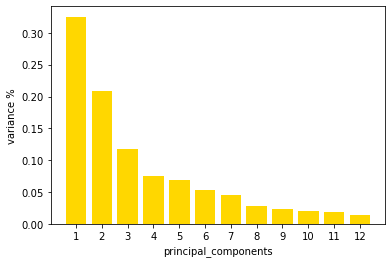

In [25]:
#plotting the variance for each PC
import matplotlib.pyplot as plt

PC = range(1, pca.n_components + 1)

plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('principal_components')
plt.ylabel('variance %')
plt.xticks(PC)

In [26]:
# we can see in the above plot that most of the variance is put in the first componenets
#Importance of each component decreases when going from1 to n, 1 PC is most important and n(12 in our case) is leat important


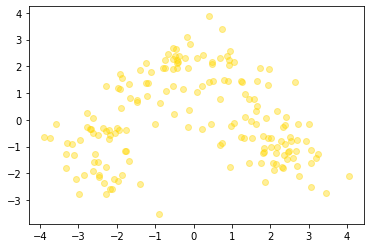

In [38]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.4, color='gold')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


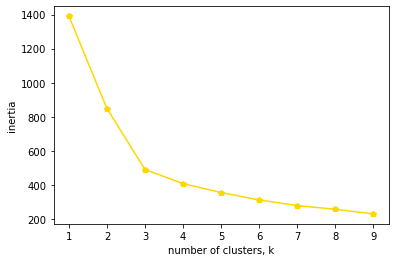

In [69]:

# by visual inspection we can see that there are 3 clusters, we can also use intertia for surity

from sklearn.cluster import KMeans

inertias = []


#creating 10 k-means models while varying the number of clusters

for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    
    #fit model to sample
    model.fit(PCA_components.iloc[:,:3])
    
    # append the intertia to the list of intertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

[1390.032749509007,
 848.5968814092575,
 491.30520416883627,
 408.84464492496755,
 356.2742785956132,
 313.25973763142275,
 279.5539100116485,
 258.3809879121128,
 231.05680979566978]

In [55]:
# we look at the inertia plot to find the elbow point in the above plot we can see that the elbow occurs at 3 clusters.

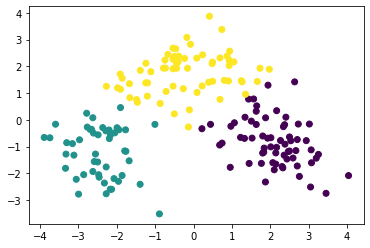

In [68]:
#Model with 3 clusters 

model_f = KMeans(n_clusters=3)

model_f.fit(PCA_components.iloc[:,:2])

labels = model_f.predict(PCA_components.iloc[:,:2])

plt.scatter(PCA_components[0], PCA_components[1],  c=labels)

plt.show()
